In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [7]:
import numpy as np

In [8]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [10]:
# perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

# 다항 특성 만들기

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# degree=2 제곱만들어줌, 기본값2
poly = PolynomialFeatures()
# PolynomialFeatures 변환기
poly.fit([[2,3]])

PolynomialFeatures()

In [5]:
# 1(bias)은 절편을위한 특성, 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [17]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


# LinearRegression

In [20]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)

(42, 9)


In [21]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [22]:
test_poly = poly.transform(test_input)

In [23]:
from sklearn.linear_model import LinearRegression

In [26]:
lr= LinearRegression()
lr.fit(train_poly, train_target)


LinearRegression()

In [27]:
print(lr.score(train_poly, train_target))

0.9903183436982125


In [28]:
print(lr.score(test_poly, test_target))

0.9714559911594155


## 더 많은 특성 만들기

In [29]:
poly = PolynomialFeatures(degree=5, include_bias=False)

In [30]:
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [31]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [32]:
print(lr.score(test_poly, test_target))
# 특성 개수를 크게 늘리면 선형 모델은 아주 강력해진다. 하지만 이런 모델은 훈련 세트에 너무
# 과대적합되므로 테스트 세트에서는 형편없는 점수를 만든다.

-144.40744532797535


### 규제

In [33]:
# 규제(regularization)는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는
# 것을 말합니다. 즉 모델이 훈련 세트에 과대적합되지 않도록 만드는 것.
# 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일
# 대표적 2가지 방법 릿지회귀, 라쏘회귀

# 규제 전에 표준화

In [36]:
from sklearn.preprocessing import StandardScaler #표준점수바꾸는 변환기
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
# 표준점수로 변환된 훈련세트와 테스트세트를 준비
# 그다음 규제가 있는 선형회귀모델을 적용해본다

# 릿지 회귀

In [38]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [39]:
print(ridge.score(test_scaled, test_target))

0.979069397761539


# 적절한 규제 강도 찾기

In [40]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [41]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

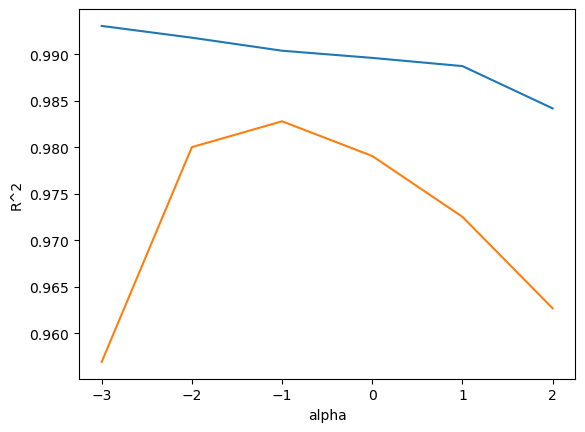

In [42]:
# 0.001,0.01,... 이런구간은 값이 좁아 확인하기어렵다
# 그래프로 그릴때는 상용로그 스케일로 바꿔서 x축 간격이 동일한 간격이 나오도록 해준다
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 그래프에서 보면 10의-1승이 가장 값이 높다
# 알파값이 커질수록 규제가 쌔지기 때문에 훈련세트의 점수가 낮아지고
# 테스트 세트의 점수는 더 낮아지는 과소적합된 모델을 볼수있다(규제를 많이 해서)
# 규제를 안하면(알파값이 줄어들면) 규제가 없으니까 훈련세트에만 잘맞는 과대적합된 모델이만들어진다
# 테스트 세트의 점수는 아주 낮아진다
# 가장 좋은 포인트는 두 포인트가 가깝고 테스트 세트의 점수가 높은 위치 즉 10의 -1승(0.1)

In [43]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))

0.9903815817570368


In [44]:
print(ridge.score(test_scaled, test_target))

0.9827976465386954


# 라쏘 회귀(릿지말고 또하나의 규제방법)

In [45]:
# 릿지는 가중치의 제곱을 벌칙으로줬는데
# 라쏘 회귀는 가중치의 절대값을 벌칙으로 준다

In [47]:
from sklearn.linear_model import Lasso
lasso = Lasso() # () alpha매개변수가 있다
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [48]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [49]:
train_score = []
test_score = []

In [51]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


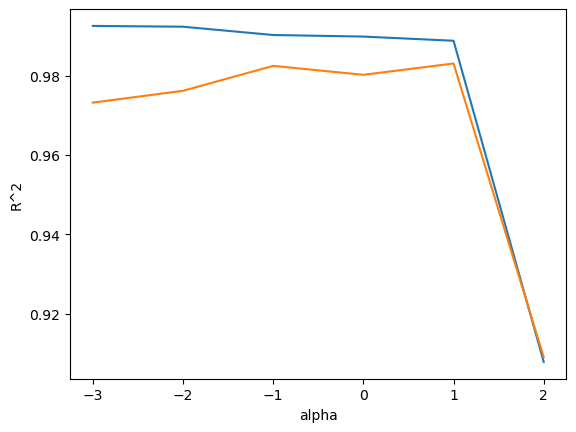

In [52]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 아래 그래프에서 보면 10의 1승정도가 가장좋아보인다

In [53]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9888067471131867


In [54]:
print(lasso.score(test_scaled, test_target))

0.9824470598706695


In [55]:
# 일반적으로는 라쏘보다는 릿지회귀
# L1규제보다는 L2규제를 조금더 선호

In [56]:
print(np.sum(lasso.coef_ == 0))
# 넘파이로 섬하면 다 1로판단되기때문에 True의 개수를 출력할 수 있다
# 총 55개의 특성을 폴리노미얼 피쳐스로 만들었었는데 라쏘 회귀는 그중에 15개만 사용
# 나머지 40개는 사용을 안하는 현상.. 이것이 라쏘의 특징(일부특성을 사용하지 않는 것)
# 그러므로 일반적으로 규제모델을 말할 때는 라쏘 보다는 릿지(L2)규제가 조금 더 효과적이다

40
